# AquaCrop Crop Growth Simulation - Alfalfa in Ottawa

This notebook demonstrates how to set up and run a crop growth simulation using the AquaCrop Python API. We'll simulate alfalfa growth in Ottawa under typical climate conditions and analyze the results.

## 1. Importing Required Libraries

First, we install and import the necessary Python libraries for data manipulation, visualization, and date handling:

In [1]:
%pip install pyaquacrop

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime

## 2. Importing AquaCrop Components

Now we import the AquaCrop model classes and pre-configured templates specific to Ottawa:

In [3]:
# Import AquaCrop classes
from aquacrop import AquaCrop, Crop, Soil, SoilLayer, Weather, FieldManagement, Calendar, Observation, Parameter

# Import template entities for Ottawa
from aquacrop.templates import (
    ottawa_alfalfa, ottawa_sandy_loam, ottawa_temperatures, ottawa_rain, 
    ottawa_eto, manuloa_co2_records, ottawa_management
)

Loaded data sizes: Temperatures=1096, ETo=1096, Rain=1096


These imports provide:
- Core model classes for building simulations
- Pre-configured templates for Ottawa, including:
  - `ottawa_alfalfa`: Calibrated alfalfa crop parameters
  - `ottawa_sandy_loam`: Ottawa soil profile
  - Weather data (temperatures, rainfall, evapotranspiration)
  - `ottawa_management`: Field management practices

## 3. Defining Simulation Periods

We define the time periods for our simulation:

In [4]:
simulation_periods = [
    {
        # Year 1:
        # First day: 41414 (21 May 2014)
        # Last day: 41577 (31 October 2014)
        # Planting: 41414 (21 May 2014)
        "start_date": date(2014, 5, 21),
        "end_date": date(2014, 10, 31),
        "planting_date": date(2014, 5, 21),
        "is_seeding_year": True,
    }
]

This configuration:
- Sets the simulation to run from May 21 to October 31, 2014
- Defines May 21 as the planting date
- Marks this as a seeding year (first year of establishment for perennial alfalfa)

## 4. Creating the Climate Object

Using the template weather data, we create a Weather object for Ottawa:

In [5]:
climate = Weather(
    location="Ottawa",
    temperatures=ottawa_temperatures,
    eto_values=ottawa_eto,
    rainfall_values=ottawa_rain,
    record_type=1,  # Daily records
    first_day=1,
    first_month=1,
    first_year=2014,
    co2_records=manuloa_co2_records,
)

This object contains:
- Daily minimum and maximum temperatures
- Reference evapotranspiration (ETo) values
- Daily rainfall measurements
- CO2 concentration records for climate effects on photosynthesis

## 5. Setting Up Output Directory

We create a directory to store the simulation results and another for visualization outputs:

In [6]:
# Set up working directory for outputs
output_dir = "outputs/basic_simulation"
os.makedirs(output_dir, exist_ok=True)

# Set up directory for visualization outputs
charts_dir = "./output_charts"
if not os.path.exists(charts_dir):
    os.makedirs(charts_dir)

### Understanding AquaCrop Output Directories

When running an AquaCrop simulation, you have two options for managing output files:

#### Option 1: User-specified Output Directory (Used in this notebook)

When you specify a `working_dir` parameter (as we do above):
- All simulation files are saved in this directory
- The directory structure persists after the simulation completes
- You can easily access the files later for further analysis
- The directory will NOT be automatically deleted

#### Option 2: Temporary Output Directory (Default)

If you don't specify a `working_dir` parameter:
- AquaCrop creates a temporary directory with a name like `aquacrop_12345678`
- This directory is typically created in your system's temp folder
- Files are still generated but in this temporary location
- The temporary directory is automatically deleted when your Python session ends
- You need to use the `save_results()` method to retain results

#### Directory Structure

Regardless of which option you choose, AquaCrop creates the following subdirectories:

```
working_dir/
├── DATA/       # Input data files (climate, crop, soil, etc.)
├── LIST/       # Project configuration files
├── OBS/        # Observation files (if any)
├── OUTP/       # Output files from the simulation
├── PARAM/      # Parameter files
└── SIMUL/      # Simulation configuration files
```

The actual simulation results (in .OUT format) are stored in the OUTP/ directory.

## 6. Creating and Running the AquaCrop Simulation

Now we initialize the AquaCrop model with all required components and run the simulation:

In [7]:
# Create AquaCrop simulation
simulation = AquaCrop(
    simulation_periods=simulation_periods,
    crop=ottawa_alfalfa,
    soil=ottawa_sandy_loam,
    management=ottawa_management,
    climate=climate,
    working_dir=output_dir,
    need_daily_output=True,
    need_seasonal_output=True,
    need_harvest_output=True,
    need_evaluation_output=True,
)

This configuration:
- Uses the Ottawa alfalfa crop parameterization
- Applies the Ottawa sandy loam soil profile
- Sets field management practices specific to alfalfa in Ottawa
- Requests all possible output types (daily, seasonal, harvest, and evaluation data)

In [8]:
# Run the simulation
results = simulation.run()
print("Simulation completed!")

Setting up working directory at: /Users/franciscopuigperez-barquero/projects/aquacrop-py/docs/notebooks/outputs/basic_simulation
Running AquaCrop simulation with project file: /Users/franciscopuigperez-barquero/projects/aquacrop-py/docs/notebooks/outputs/basic_simulation/LIST/PROJECT.PRM
Detected platform: darwin (x86_64)
Looking for executable at: /Users/franciscopuigperez-barquero/projects/aquacrop-py/model/macOS/aquacrop
AquaCrop executable not found at /Users/franciscopuigperez-barquero/projects/aquacrop-py/model/macOS/aquacrop. Downloading from https://github.com/KUL-RSDA/AquaCrop/releases/download/v7.2/aquacrop-7.2-x86_64-macos.zip
Extracted AquaCrop executable to /Users/franciscopuigperez-barquero/projects/aquacrop-py/model/macOS/aquacrop-7.2-x86_64-macos/aquacrop
Using AquaCrop executable: /Users/franciscopuigperez-barquero/projects/aquacrop-py/docs/notebooks/outputs/basic_simulation/aquacrop
AquaCrop simulation completed successfully
Parsing simulation results...
Results succe

## 7. Understanding the Results Structure

The `simulation.run()` method returns results as a Python dictionary containing pandas DataFrames for easy data manipulation and analysis:

### Results Dictionary Structure

```python
results = {
    'day': {...},         # Daily output results
    'season': ...,        # Seasonal summary results
    'harvests': {...},    # Harvest results (for multiple cuttings)
    'evaluation': {...}   # Evaluation results (if field observations provided)
}
```

#### Daily Results (`results['day']`)

For simplicity, daily results are returned as a nested dictionary where:
- The outer keys are run numbers (usually 1 for a single simulation)
- The values are pandas DataFrames containing daily simulation data

```python
# Structure of daily results
daily_results = {
    1: pd.DataFrame(...),  # DataFrame for run 1
    2: pd.DataFrame(...),  # DataFrame for run 2 (if multiple runs)
    # ...
}
```

This structure allows AquaCrop to return results from multiple simulation runs, such as when performing sensitivity analysis or multi-year simulations.

#### Harvest Results

Harvest results follow the same structure as daily results, with a dictionary of DataFrames by run number.

#### Other Result Types

- **Season Results**: Usually a single DataFrame with one row per simulation run
- **Evaluation Results**: Contains nested dictionaries for different evaluation metrics

When working with results, always check if they're a dictionary (multiple runs) or a direct DataFrame (single run) to handle them correctly, as we do in the visualization code below.

## 8. Analyzing Simulation Results

After running the simulation, we examine the seasonal and harvest results:

In [9]:
# Display seasonal results
season_results = results['season']
if season_results is not None:
    print("\nSeasonal Results:")
    display(season_results)


Seasonal Results:


,RunNr,Day1,Month1,Year1,Rain,ETo,GD,CO2,Irri,Infilt,...,HI,Y(dry),Y(fresh),WPet,Bin,Bout,DayN,MonthN,YearN,Project
0,1,21,5,2014,487.5,431.0,1802.6,398.82,0.0,484.1,...,98.3,9.014,45.072,2.15,0.0,2.336,31,10,2014,PROJECT.PRM


In [10]:
# Display harvest results
harvest_results = results['harvests']
if harvest_results is not None:
    print("\nHarvest Results:")
    display(harvest_results)


Harvest Results:


,Nr,Day,Month,Year,DAP,Interval,Biomass,Sum(B),Dry-Yield,Sum(Y),Fresh-Yield,Sum(Y)
0,0,21,5,2014,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN
1,1,13,7,2014,54.000,54.000,4.787,4.787,4.629,4.629,23.143,23.143
2,2,31,8,2014,103.000,49.000,3.082,7.869,3.082,7.711,15.409,38.553
3,9999,1,11,2014,9.172,9.014,45.072,NaN,NaN,NaN,NaN,NaN


### Understanding the Results

#### Seasonal Results
The seasonal results provide an overview of the entire growing season, including:
- Water balance components (rainfall, irrigation, drainage, runoff)
- Crop development indicators (biomass, yield)
- Water use efficiency metrics
- Growing season duration

#### Harvest Results
For alfalfa, which is typically harvested multiple times in a season:
- Each cutting date and corresponding biomass
- Fresh and dry yield at each cutting
- Cumulative yield over the season

## 9. Visualizing Daily Results - Canopy Cover Development

Let's create a detailed visualization of canopy cover development over time:

Saved chart to ./output_charts/canopy_cover_run_1.png


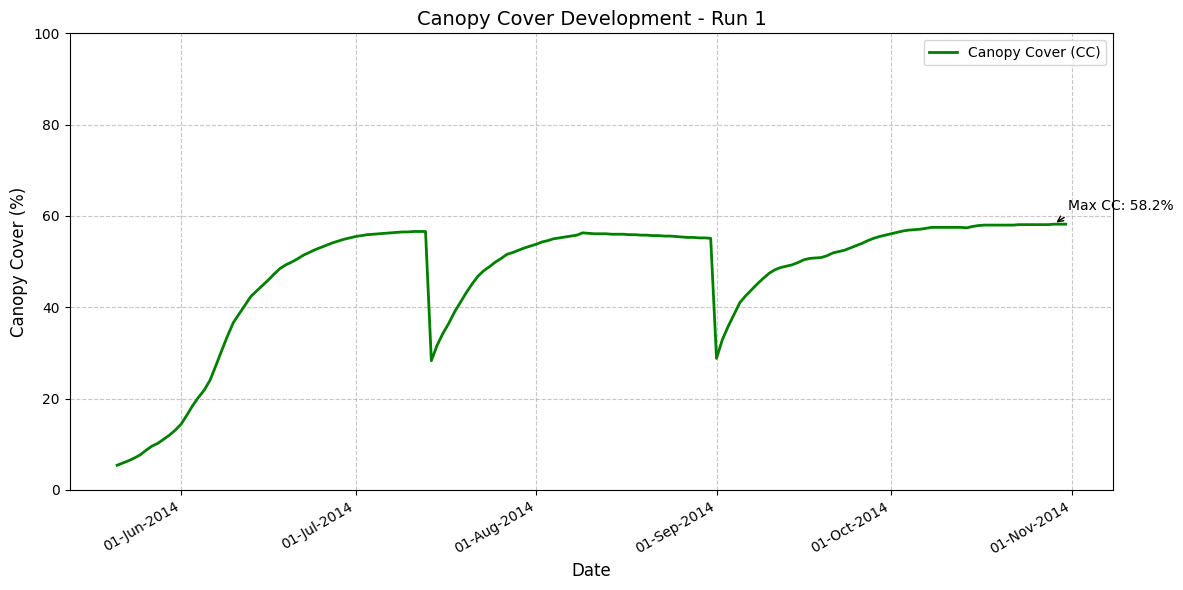

In [11]:
# Access daily data
daily_results = results['day']

# Determine if we have a dictionary (multiple runs) or a single DataFrame
if isinstance(daily_results, dict):
    run_dfs = daily_results
else:
    # Handle single DataFrame case
    run_dfs = {1: daily_results}

# Create plots for each run
for run_num, df in run_dfs.items():
    # Check if we have the required columns
    if 'CC' not in df.columns:
        print(f"Warning: Canopy Cover (CC) data not found in Run {run_num}")
        continue
        
    if not all(col in df.columns for col in ['Day', 'Month', 'Year']):
        print(f"Warning: Date columns (Day, Month, Year) not found in Run {run_num}")
        continue
    
    # Create datetime objects from Day, Month, Year columns
    dates = []
    for i in range(len(df)):
        try:
            day = int(df['Day'].iloc[i])
            month = int(df['Month'].iloc[i])
            year = int(df['Year'].iloc[i])
            dates.append(datetime(year, month, day))
        except (ValueError, TypeError):
            # Handle any invalid date values
            dates.append(None)
    
    # Filter out any None values
    valid_indices = [i for i, date in enumerate(dates) if date is not None]
    valid_dates = [dates[i] for i in valid_indices]
    cc_values = [df['CC'].iloc[i] for i in valid_indices]
    
    if not valid_dates:
        print(f"Warning: No valid dates found in Run {run_num}")
        continue
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot the data
    ax.plot(valid_dates, cc_values, 'g-', linewidth=2)
    
    # Add grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Canopy Cover (%)', fontsize=12)
    ax.set_title(f'Canopy Cover Development - Run {run_num}', fontsize=14)
    
    # Format x-axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    fig.autofmt_xdate()  # Rotate date labels for better readability
    
    # Set y-axis limits with padding
    if cc_values:
        max_cc = max(cc_values)
        ax.set_ylim([0, max(100, max_cc * 1.1)])  # Cap at 100% but allow higher if in data
    
    # Add annotations for key points
    if cc_values:
        max_cc_index = np.argmax(cc_values)
        max_cc_value = cc_values[max_cc_index]
        max_cc_date = valid_dates[max_cc_index]
        
        # Annotate maximum CC point
        ax.annotate(f'Max CC: {max_cc_value:.1f}%',
                    xy=(max_cc_date, max_cc_value),
                    xytext=(10, 10),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
    
    # Add legend
    ax.legend(['Canopy Cover (CC)'], loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save figure to the charts directory
    fig_path = os.path.join(charts_dir, f'canopy_cover_run_{run_num}.png')
    plt.savefig(fig_path, dpi=300, bbox_inches='tight')
    print(f"Saved chart to {fig_path}")
    
    # Display the figure
    plt.show()

## 10. Visualizing Multiple Daily Variables

Let's create a comprehensive visualization of multiple daily variables to better understand the dynamics:

Available columns in daily results:
  - 2
  - 2_1
  - 3
  - 3_1
  - 4
  - 4_1
  - 5
  - 5_1
  - 6
  - 6_1
  - 7
  - 7_1
  - 8
  - 8_1
  - 9
  - 9_1
  - Bin
  - Biomass
  - Bout
  - Brelative
  - CC
  - CCw
  - CO2
  - CR
  - DAP
  - Day
  - Drain
  - E
  - E/Ex
  - ECe
  - ECe01
  - ECe10
  - ECe11
  - ECe12
  - ECe_1
  - ECe_2
  - ECe_3
  - ECe_4
  - ECe_5
  - ECe_6
  - ECe_7
  - ECe_8
  - ECgw
  - ECsw
  - ET
  - ET/ETx
  - ETo
  - ETx
  - Ex
  - GD
  - HI
  - Infilt
  - Irri
  - Kc(Tr)
  - Month
  - RO
  - Rain
  - Rain_1
  - Salt(3.00)
  - SaltIn
  - SaltOut
  - SaltUp
  - SaltZ
  - StExp
  - StSalt
  - StSalt_1
  - StSen
  - StSto
  - StTr
  - StWeed
  - Stage
  - Surf
  - Tavg
  - Tmax
  - Tmin
  - Tr
  - Tr/Trx
  - Tr/Trx_1
  - TrW
  - Tr_1
  - Trx
  - Trx_1
  - WC
  - WC(3.00)
  - WC(3.00)_1
  - WC01
  - WC10
  - WC11
  - WC12
  - WC_1
  - WC_2
  - WC_3
  - WC_4
  - WC_5
  - WC_6
  - WC_7
  - WP
  - WPet
  - Wr
  - Wr(3.00)
  - Wr(FC)
  - Wr(PWP)
  - Wr(SAT)
  - Wr(exp)
  - Wr(

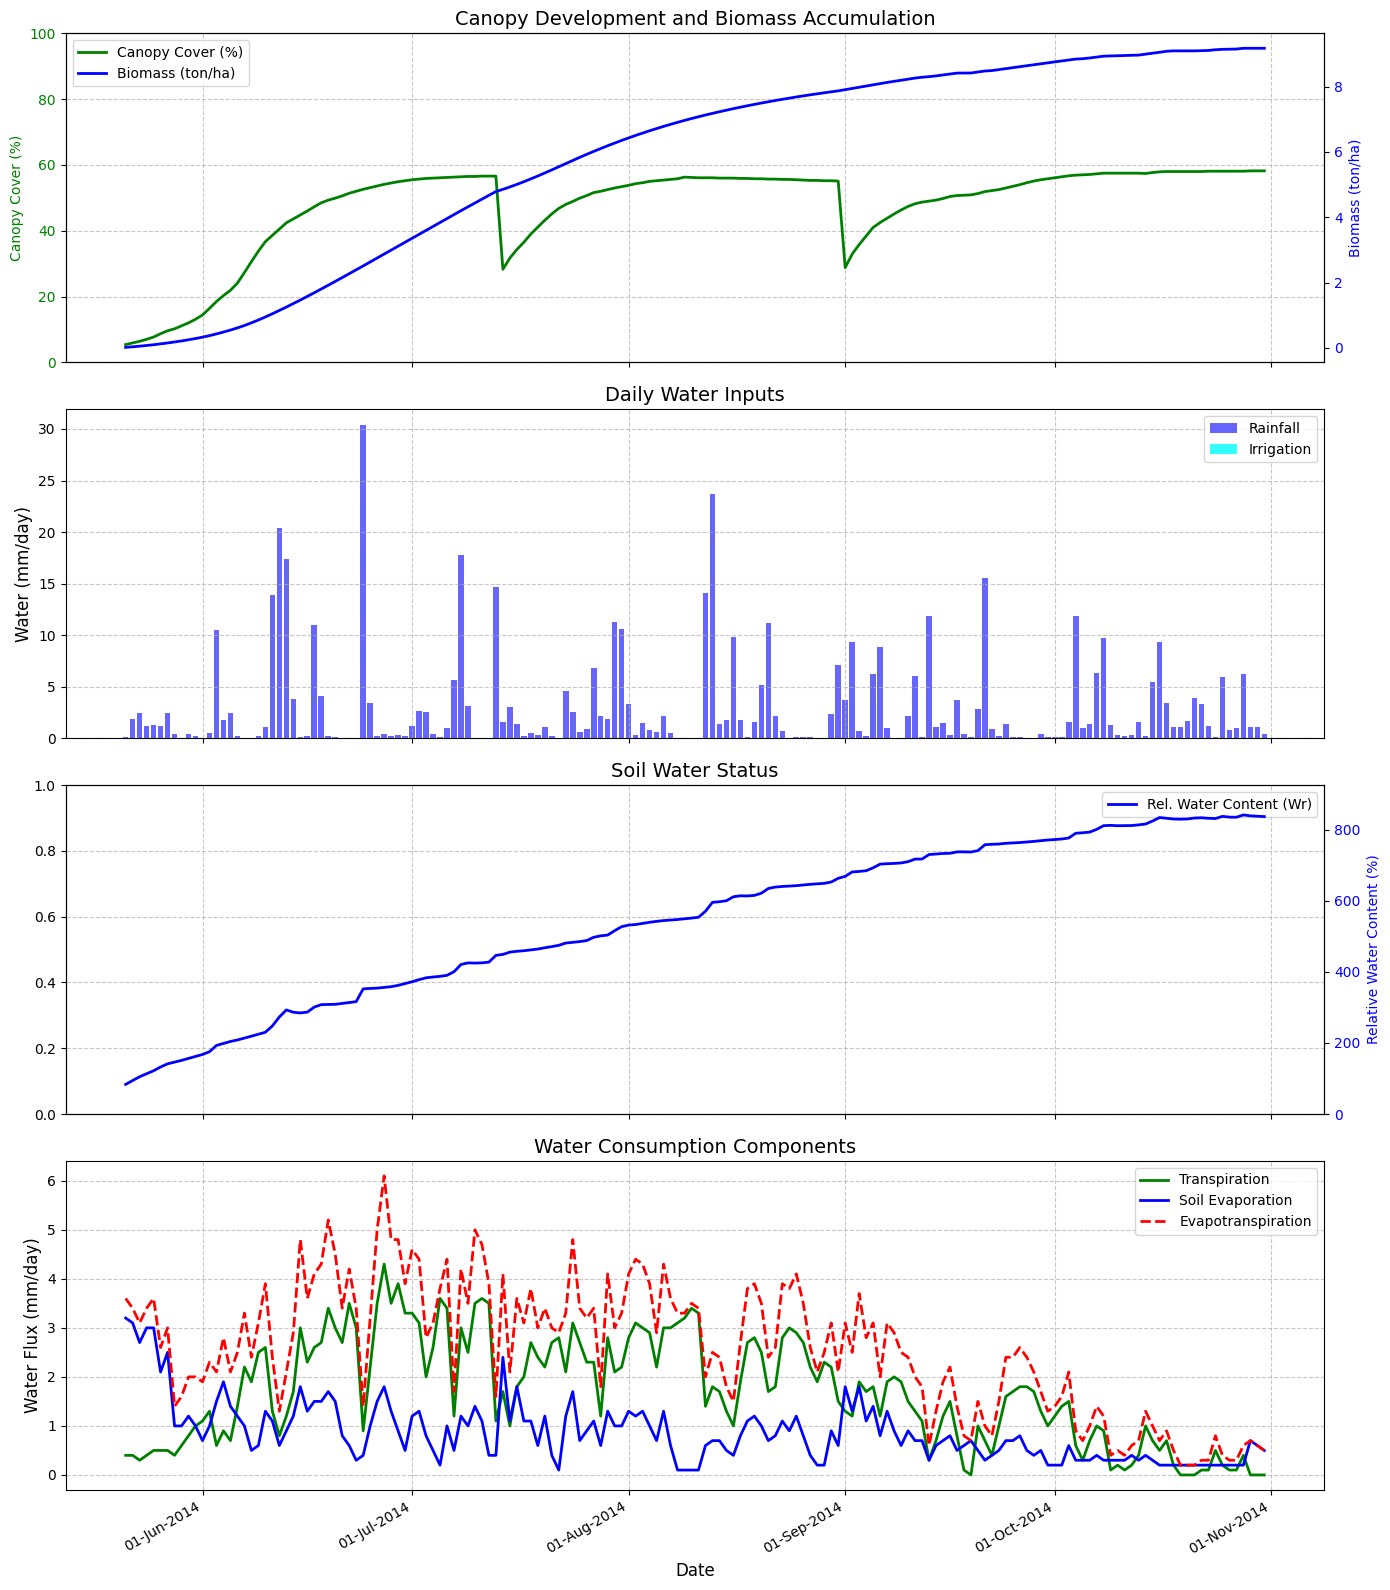

In [12]:
# Print available columns for reference
if daily_results is not None and len(run_dfs) > 0:
    run_key = list(run_dfs.keys())[0]
    df = run_dfs[run_key]
    print("Available columns in daily results:")
    for col in sorted(df.columns):
        print(f"  - {col}")

# Create multi-panel visualization
if daily_results is not None and len(run_dfs) > 0:
    # Get the first run
    run_key = list(run_dfs.keys())[0]
    df = run_dfs[run_key]
    
    # Create datetime objects for plotting
    dates = []
    for i in range(len(df)):
        try:
            day = int(df['Day'].iloc[i])
            month = int(df['Month'].iloc[i])
            year = int(df['Year'].iloc[i])
            dates.append(datetime(year, month, day))
        except (ValueError, TypeError):
            dates.append(None)
    
    # Filter out any None values
    valid_indices = [i for i, date in enumerate(dates) if date is not None]
    valid_dates = [dates[i] for i in valid_indices]
    
    if not valid_dates:
        print("Warning: No valid dates found for plotting")
    else:
        # Create a figure with multiple subplots
        fig, axes = plt.subplots(4, 1, figsize=(14, 16), sharex=True)
        
        # 1. Canopy Cover and Biomass
        ax1 = axes[0]
        ax1_twin = ax1.twinx()  # Create twin axis for biomass
        
        # Plot canopy cover
        if 'CC' in df.columns:
            cc_values = [df['CC'].iloc[i] for i in valid_indices]
            line1 = ax1.plot(valid_dates, cc_values, 'g-', linewidth=2, label='Canopy Cover')
            ax1.set_ylabel('Canopy Cover (%)', color='green')
            ax1.tick_params(axis='y', labelcolor='green')
            ax1.set_ylim(0, max(100, max(cc_values) * 1.1) if cc_values else 100)
        
        # Plot biomass on twin axis
        if 'Biomass' in df.columns:
            biomass_values = [df['Biomass'].iloc[i] for i in valid_indices]
            line2 = ax1_twin.plot(valid_dates, biomass_values, 'b-', linewidth=2, label='Biomass')
            ax1_twin.set_ylabel('Biomass (ton/ha)', color='blue')
            ax1_twin.tick_params(axis='y', labelcolor='blue')
        
        ax1.set_title('Canopy Development and Biomass Accumulation', fontsize=14)
        ax1.grid(True, linestyle='--', alpha=0.7)
        
        # Legend for two y-axes
        lines = []
        labels = []
        if 'CC' in df.columns:
            lines.extend(line1)
            labels.append('Canopy Cover (%)')
        if 'Biomass' in df.columns:
            lines.extend(line2)
            labels.append('Biomass (ton/ha)')
        ax1.legend(lines, labels, loc='upper left')
        
        # 2. Water Balance - Rain and Irrigation
        ax2 = axes[1]
        
        has_rain = 'Rain' in df.columns
        has_irri = 'Irri' in df.columns
        
        if has_rain or has_irri:
            if has_rain:
                rain_values = [df['Rain'].iloc[i] for i in valid_indices]
                ax2.bar(valid_dates, rain_values, color='blue', alpha=0.6, label='Rainfall')
            
            if has_irri:
                irri_values = [df['Irri'].iloc[i] for i in valid_indices]
                ax2.bar(valid_dates, irri_values, color='cyan', alpha=0.8, label='Irrigation')
            
            ax2.set_ylabel('Water (mm/day)', fontsize=12)
            ax2.set_title('Daily Water Inputs', fontsize=14)
            ax2.legend()
            ax2.grid(True, linestyle='--', alpha=0.7)
        
        # 3. Soil Water Content
        ax3 = axes[2]
        ax3_twin = ax3.twinx()
        
        # Check what water content columns are available in the dataframe
        water_columns = [col for col in df.columns if col in ['Dr', 'Wr', 'SWC', 'Wp', 'Ws', 'Wrel', 'RWC']]
        print(f"Available water content columns: {water_columns}")
        
        # Plot root zone depletion if available
        if 'Dr' in df.columns:
            dr_values = [df['Dr'].iloc[i] for i in valid_indices]
            line3 = ax3.plot(valid_dates, dr_values, 'r-', linewidth=2, label='Root Zone Depletion')
            ax3.set_ylabel('Root Zone Depletion (mm)', color='red')
            ax3.tick_params(axis='y', labelcolor='red')
            ax3.invert_yaxis()  # Higher depletion values go down
            
            # Add threshold lines if needed
            if 'TAW' in df.columns:  # Total Available Water
                taw_values = [df['TAW'].iloc[i] for i in valid_indices]
                if any(v > 0 for v in taw_values):  # Only if we have valid TAW values
                    # Plot TAW as a line
                    ax3.plot(valid_dates, taw_values, 'r--', linewidth=1, alpha=0.5, label='TAW')
                    
                    # Calculate and plot RAW (Readily Available Water) if needed
                    # Typically RAW is around 50-60% of TAW depending on crop
                    raw_factor = 0.6  # Adjust based on your specific crop
                    raw_values = [v * raw_factor for v in taw_values]
                    ax3.plot(valid_dates, raw_values, 'r:', linewidth=1, alpha=0.5, label='RAW (est.)')
        
        # Try different column names for relative water content
        relative_water_col = None
        for col_name in ['Wr', 'Wrel', 'RWC', 'RelWC', 'Ws']:
            if col_name in df.columns:
                relative_water_col = col_name
                break
        
        # Plot relative water content on twin axis if available
        if relative_water_col:
            # Check if the values are already percentages or fractions
            wr_values = [df[relative_water_col].iloc[i] for i in valid_indices]
            if max(wr_values) <= 1.0:  # If values are in fraction (0-1), convert to percentage
                wr_values = [v * 100 for v in wr_values]
            
            line4 = ax3_twin.plot(valid_dates, wr_values, 'b-', linewidth=2, label=f'Rel. Water Content ({relative_water_col})')
            ax3_twin.set_ylabel('Relative Water Content (%)', color='blue')
            ax3_twin.tick_params(axis='y', labelcolor='blue')
            ax3_twin.set_ylim(0, max(100, max(wr_values) * 1.1) if wr_values else 100)
        elif 'SWC' in df.columns:  # Alternative: plot actual soil water content
            swc_values = [df['SWC'].iloc[i] for i in valid_indices]
            line4 = ax3_twin.plot(valid_dates, swc_values, 'b-', linewidth=2, label='Soil Water Content')
            ax3_twin.set_ylabel('Soil Water Content (mm)', color='blue')
            ax3_twin.tick_params(axis='y', labelcolor='blue')
        else:
            # If no water content columns are available, we'll just display root zone depletion
            line4 = []
            print("No relative water content or soil water content columns found in daily output.")
        
        ax3.set_title('Soil Water Status', fontsize=14)
        ax3.grid(True, linestyle='--', alpha=0.7)
        
        # Add legend for twin axes
        lines3 = []
        labels3 = []
        if 'Dr' in df.columns:
            lines3.extend(line3)
            labels3.append('Root Zone Depletion (mm)')
            if 'TAW' in df.columns:
                lines3.extend([plt.Line2D([0], [0], color='r', linestyle='--', alpha=0.5)])
                labels3.append('Total Available Water')
                lines3.extend([plt.Line2D([0], [0], color='r', linestyle=':', alpha=0.5)])
                labels3.append('Readily Available Water (est.)')
        if relative_water_col or 'SWC' in df.columns:
            lines3.extend(line4)
            if relative_water_col:
                labels3.append(f'Rel. Water Content ({relative_water_col})')
            else:
                labels3.append('Soil Water Content (mm)')
        if lines3:
            ax3.legend(lines3, labels3, loc='upper right')
        
        # 4. Transpiration and Evaporation
        ax4 = axes[3]
        
        has_tr = 'Tr' in df.columns
        has_e = 'E' in df.columns
        has_et = 'ET' in df.columns
        
        if has_tr or has_e or has_et:
            if has_tr:
                tr_values = [df['Tr'].iloc[i] for i in valid_indices]
                ax4.plot(valid_dates, tr_values, 'g-', linewidth=2, label='Transpiration')
            
            if has_e:
                e_values = [df['E'].iloc[i] for i in valid_indices]
                ax4.plot(valid_dates, e_values, 'b-', linewidth=2, label='Soil Evaporation')
            
            if has_et:
                et_values = [df['ET'].iloc[i] for i in valid_indices]
                ax4.plot(valid_dates, et_values, 'r--', linewidth=2, label='Evapotranspiration')
            
            ax4.set_ylabel('Water Flux (mm/day)', fontsize=12)
            ax4.set_title('Water Consumption Components', fontsize=14)
            ax4.legend()
            ax4.grid(True, linestyle='--', alpha=0.7)
        
        # Format x-axis for all subplots
        ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
        ax4.xaxis.set_major_locator(mdates.MonthLocator())
        ax4.set_xlabel('Date', fontsize=12)
        fig.autofmt_xdate()  # Rotate date labels
        
        # Adjust layout
        plt.tight_layout()
        
        # Save figure
        fig_path = os.path.join(charts_dir, 'daily_variables_combined.png')
        plt.savefig(fig_path, dpi=300, bbox_inches='tight')
        print(f"Saved combined chart to {fig_path}")
        
        # Display the figure
        plt.show()
else:
    print("No daily data available for visualization")

## 11. Advanced Analysis: Water Productivity

Let's analyze the water productivity (biomass produced per unit of water consumed):

In [13]:
if 'season' in results and results['season'] is not None:
    # Extract key water productivity metrics
    season_df = results['season']
    
    # Create a summary of water productivity metrics
    summary = pd.DataFrame()
    
    if 'Yield' in season_df.columns and 'Rain' in season_df.columns:
        summary['Yield (ton/ha)'] = season_df['Yield']
        summary['Rainfall (mm)'] = season_df['Rain']
        
        if 'Irri' in season_df.columns:
            summary['Irrigation (mm)'] = season_df['Irri']
        else:
            summary['Irrigation (mm)'] = 0
            
        if 'Tr' in season_df.columns and 'ET' in season_df.columns:
            summary['Transpiration (mm)'] = season_df['Tr']
            summary['Evapotranspiration (mm)'] = season_df['ET']
            
            # Calculate water productivity metrics
            summary['WP (kg/m³)'] = season_df['Yield'] * 1000 / (season_df['ET'] * 10)  # Convert ton/ha and mm to kg/m³
            summary['WP_T (kg/m³)'] = season_df['Yield'] * 1000 / (season_df['Tr'] * 10)  # Water productivity with respect to transpiration
    
    # Display the summary
    display(summary)
    
    # Create a bar chart of water productivity
    if 'WP (kg/m³)' in summary.columns and 'WP_T (kg/m³)' in summary.columns:
        plt.figure(figsize=(10, 6))
        bar_width = 0.3
        x = np.arange(len(summary))
        
        plt.bar(x - bar_width/2, summary['WP (kg/m³)'], bar_width, label='WP (based on ET)')
        plt.bar(x + bar_width/2, summary['WP_T (kg/m³)'], bar_width, label='WP_T (based on Transpiration)')
        
        plt.xlabel('Simulation Run')
        plt.ylabel('Water Productivity (kg/m³)')
        plt.title('Water Productivity of Alfalfa in Ottawa')
        plt.xticks(x)
        plt.legend()
        plt.grid(True, axis='y')
        
        # Save the figure
        fig_path = os.path.join(charts_dir, 'water_productivity.png')
        plt.savefig(fig_path, dpi=300, bbox_inches='tight')
        print(f"Saved water productivity chart to {fig_path}")
        
        plt.show()
else:
    print("No seasonal data available for water productivity analysis")

""


## 12. Saving Results to Files

Let's save our simulation results to CSV files for further analysis:

In [14]:
# Create a specific directory for CSV outputs
csv_dir = os.path.join(output_dir, "csv_results")
os.makedirs(csv_dir, exist_ok=True)

# Save simulation results to CSV files
simulation.save_results(output_path=csv_dir)

print(f"Results saved to {csv_dir}")
print(f"Files saved: {os.listdir(csv_dir)}")

Saving results to: outputs/basic_simulation/csv_results
Results successfully saved
Results saved to outputs/basic_simulation/csv_results
Files saved: ['seasonal_results.csv', 'harvest_results.csv', 'evaluation_statistics.json', 'daily_results.csv', 'evaluation_biomass.csv']


## 13. Future Extensions and Applications

This notebook provides a foundation for more complex AquaCrop modeling exercises. Here are some ways you could extend this analysis:

1. **Climate change scenarios**:
   - Modify temperature data to simulate warming
   - Adjust rainfall patterns to model drought or increased precipitation
   - Test different CO2 concentration pathways

2. **Management optimization**:
   - Test different planting dates to maximize yield
   - Optimize irrigation schedules for water use efficiency
   - Compare different soil fertility levels

3. **Multi-year simulations**:
   - Add more years to simulation_periods to analyze perennial crop performance
   - Study yield stability across multiple growing seasons
   - Assess long-term sustainability of management practices

4. **Variety comparison**:
   - Create different crop parameterizations to represent various alfalfa varieties
   - Compare drought-resistant vs. high-yielding varieties
   
5. **Regional adaptation**:
   - Use weather data from different regions to assess crop suitability
   - Identify optimal growing regions for specific crops